## groupby()


#### groupby()와 함께 사용하는 집계 메소드

- count : 누락값을 제외한 데이타 수를 반환
- size : 누락값을 포함한 데이타 수를 반환
- sum
- mean
- std
- var
- min
- max
- quantile(q=0.25)
- quantile(q=0.50)
- quantile(q=0.75) 
- describe
- first
- last
- nth   : n번째 행 반환
- sem   : 평균의 표준편차 반환

In [2]:
import pandas as pd

df = pd.read_excel('data/고속버스.xlsx') 
df

,차종,선별,출발지,도착지,거리,총운행횟수,총이용인원,이용율
0,우등,88선,광주,울산,327.8,412,7283,63.1
1,고속,88선,광주,울산,327.8,145,3050,46.7
2,우등,88선,광주,울산신복,327.8,164,545,11.9
3,고속,88선,광주,울산신복,327.8,70,311,9.9
4,우등,88선,광주,동대구,219.3,1369,21873,57.1
...,...,...,...,...,...,...,...,...
346,고속,호남선,청주,광주,207.5,268,4858,40.3
347,고속,호남선,청주시외,여수,290.1,21,513,54.3
348,우등,호남선,광주,전주,105.9,1802,34137,67.7
349,고속,호남선,광주,전주,105.9,1043,30394,64.8


In [3]:
# 그룹화 - '선별' 단위로 각각의 노선에 대한 총 갯수

# df.groupby('선별').count()

#세분화
# df_group = df.groupby('선별')
# df_group.count()

temp = df[['선별','차종']]

result = temp.groupby('선별')['차종'].count().sort_values(ascending=False)
print(result)

df[['선별','차종']].groupby('선별').count().sort_values('차종', ascending=False)

선별
호남선    122
경부선    105
구마선     30
영동선     26
경인선     25
남해선     21
88선     18
동해선      4
Name: 차종, dtype: int64


,차종
선별,
호남선,122
경부선,105
구마선,30
영동선,26
경인선,25
남해선,21
88선,18
동해선,4


In [5]:
# 한글처리
from matplotlib import rc
rc('font', family='Malgun Gothic')

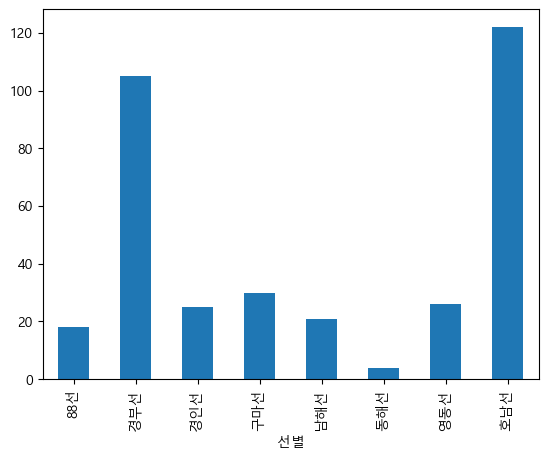

In [6]:
# 노선별 수에 대한 그래프

temp = df.groupby('선별')['선별'].count()
temp

temp.plot(kind='bar');


In [7]:
# 차종별, 노선별별 그룹화 작업


In [8]:
temp1 = df.groupby(['차종', '선별']).size().reset_index(name='count')
temp1 = temp1.sort_values(by='count', ascending=False)

temp1
# temp1.plot(kind='bar');

,차종,선별,count
7,고속,호남선,63
15,우등,호남선,59
1,고속,경부선,57
9,우등,경부선,48
11,우등,구마선,16
3,고속,구마선,14
6,고속,영동선,14
10,우등,경인선,14
4,고속,남해선,13
14,우등,영동선,12


In [9]:
# 교차테이블(cross tab) - 엑셀의 Pivot 유사
result= pd.crosstab( df['차종'], df['선별']) #첫번째인자: 인덱스, 두번째인자:컬럼
result

선별,88선,경부선,경인선,구마선,남해선,동해선,영동선,호남선
차종,,,,,,,,
고속,7,57,11,14,13,2,14,63
우등,11,48,14,16,8,2,12,59


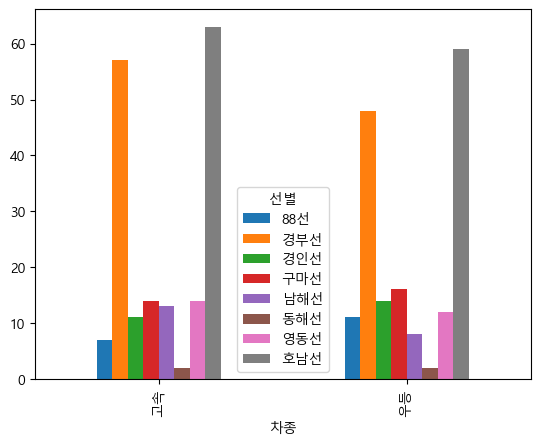

In [10]:
result.plot(kind='bar');